In [5]:
%load_ext autoreload
%autoreload 2
import torch
from torch import Tensor
import torchvision
import matplotlib.pyplot as plt
import statistics
import random
import time
import math
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10
import toolset as ts
from toolset import *
from toolset.utils import *
from toolset.data import *
from toolset.helper import *
from toolset.solver import *
reset_seed(0)
data_dict = ts.data.preprocess_cifar10(cuda=True, dtype=torch.float64, flatten=False,show_examples=False)
print('Train data shape: ', data_dict['X_train'].shape)
print('Train labels shape: ', data_dict['y_train'].shape)
print('Validation data shape: ', data_dict['X_val'].shape)
print('Validation labels shape: ', data_dict['y_val'].shape)
print('Test data shape: ', data_dict['X_test'].shape)
print('Test labels shape: ', data_dict['y_test'].shape)
from convolutional_networks import DeepConvNet
from fully_connected_networks import adam
# num_train = 50
# small_data = {
#   'X_train': data_dict['X_train'][:num_train],
#   'y_train': data_dict['y_train'][:num_train],
#   'X_val': data_dict['X_val'][:500],
#   'y_val': data_dict['y_val'][:500],
# }
# input_dims = data_dict['X_train'].shape[1:]


In [4]:
vgg16_model = DeepConvNet(
                input_dims=(3, 32, 32),
                num_filters=[64, 64, 
                             128, 128, 
                             256, 256, 256, 
                             512, 512, 512, 
                             512, 512, 512],
                max_pools=[1, 3, 6, 9, 12],
                batchnorm=True,
                num_classes=10,
                weight_scale='kaiming',
                reg=1e-5,
                dtype=torch.float32,
                device='cuda'
)

# vgg11_model = DeepConvNet(
#                 input_dims=(3, 32, 32),
#                 num_filters=[64, 
#                              128, 
#                              256, 256, 
#                              512, 512, 
#                              512, 512],
#                 max_pools=[0, 1, 3, 5, 7],
#                 batchnorm=True,
#                 num_classes=10,
#                 weight_scale='kaiming',
#                 reg=1e-5,
#                 dtype=torch.float32,
#                 device='cuda'
# )

# def check_loss(model: DeepConvNet):
    
#     loss, _ = model.loss(small_data['X_train'], small_data['y_train'])
#     print(loss)
# check_loss(vgg11_model)

NameError: name 'DeepConvNet' is not defined

In [3]:
from fully_connected_networks import sgd_momentum
from toolset.solver import *
solver = None
solver = Solver(vgg16_model, data_dict,
                num_epochs=10, batch_size=50,
                optim_config={
                'learning_rate': 5e-5,
                },
                update_rule=adam,
                verbose=True, device='cuda',lr_decay=0.95)

NameError: name 'vgg16_model' is not defined

In [5]:
solver.train(time_limit=600)

(用时 1.73s; 迭代次数1 / 8000) loss: 3.409555
(Epoch 0 / 10, train 准确率: 10.90%, val准确率: 10.40%
(用时 12.68s; 迭代次数11 / 8000) loss: 2.295950
(用时 14.23s; 迭代次数21 / 8000) loss: 2.381278
(用时 15.80s; 迭代次数31 / 8000) loss: 2.253708
(用时 17.34s; 迭代次数41 / 8000) loss: 2.031245
(用时 18.93s; 迭代次数51 / 8000) loss: 1.863155
(用时 20.52s; 迭代次数61 / 8000) loss: 2.080767
(用时 22.04s; 迭代次数71 / 8000) loss: 1.894391
(用时 23.63s; 迭代次数81 / 8000) loss: 2.007092
(用时 25.19s; 迭代次数91 / 8000) loss: 1.691607
(用时 26.74s; 迭代次数101 / 8000) loss: 1.766428
(用时 28.30s; 迭代次数111 / 8000) loss: 1.586421
(用时 29.85s; 迭代次数121 / 8000) loss: 1.786161
(用时 31.36s; 迭代次数131 / 8000) loss: 1.661335
(用时 32.89s; 迭代次数141 / 8000) loss: 1.643965
(用时 34.39s; 迭代次数151 / 8000) loss: 2.134676
(用时 35.97s; 迭代次数161 / 8000) loss: 1.627447
(用时 37.53s; 迭代次数171 / 8000) loss: 1.787263
(用时 39.07s; 迭代次数181 / 8000) loss: 1.416081
(用时 40.64s; 迭代次数191 / 8000) loss: 1.572966
(用时 42.16s; 迭代次数201 / 8000) loss: 1.465447
(用时 43.75s; 迭代次数211 / 8000) loss: 1.584997
(用时 45.31s; 迭代次数2

In [20]:
# from fully_connected_networks import sgd_momentum
# model = DeepConvNet(input_dims=input_dims, num_classes=10,
#                     num_filters=[8, 8, 8],
#                     max_pools=[0, 1, 2],
#                     weight_scale='kaiming',
#                     batchnorm=False,
#                     reg=1e-5, dtype=torch.float32, device='cuda')
# solver = Solver(model, small_data,
#             num_epochs=1000, batch_size=50,
#             update_rule = adam,
#             optim_config={
#             'learning_rate': 0.001,
#             },
#             verbose=True, device='cuda',print_every=2000)
# solver.train(time_limit=60)

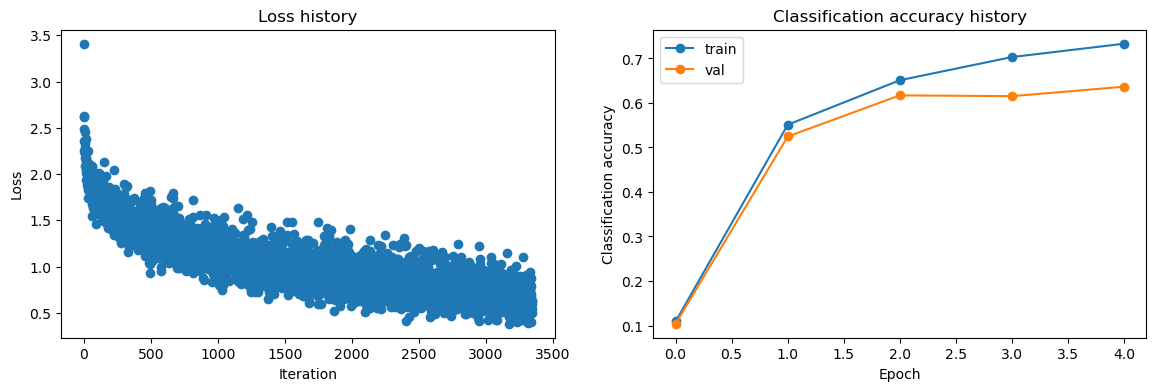

In [16]:
from toolset.helper import plot_solver
plot_solver(solver)


In [18]:

vgg16_model.save("D:/Paper/Vgg16/60.pth")

Saved in D:/Paper/Vgg16/60.pth


In [ ]:
# 用于google
PATH = './drive/My Drive/tran.pth'
vgg16_model.save(PATH)


In [24]:


solver = Solver(vgg16_model, data_dict,
                num_epochs=10, batch_size=50,
                optim_config={
                'learning_rate': 5e-5,
                },
                update_rule=adam,
                verbose=True, device='cuda',lr_decay=0.95,print_every=50)

In [25]:
solver.train(time_limit=300)

(用时 0.15s; 迭代次数1 / 8000) loss: 1.543481
(Epoch 0 / 10, train 准确率: 79.70%, val准确率: 65.92%
(用时 17.23s; 迭代次数51 / 8000) loss: 1.186100
(用时 24.82s; 迭代次数101 / 8000) loss: 1.355466
(用时 32.39s; 迭代次数151 / 8000) loss: 1.402516
(用时 40.20s; 迭代次数201 / 8000) loss: 1.657722
(用时 48.27s; 迭代次数251 / 8000) loss: 1.221169
(用时 55.94s; 迭代次数301 / 8000) loss: 1.122536
(用时 63.50s; 迭代次数351 / 8000) loss: 1.172516
(用时 71.28s; 迭代次数401 / 8000) loss: 1.060816
(用时 78.88s; 迭代次数451 / 8000) loss: 1.028831
(用时 86.65s; 迭代次数501 / 8000) loss: 1.331450
(用时 94.56s; 迭代次数551 / 8000) loss: 1.143029
(用时 102.26s; 迭代次数601 / 8000) loss: 1.078917
(用时 110.73s; 迭代次数651 / 8000) loss: 1.169832
(用时 119.13s; 迭代次数701 / 8000) loss: 1.365047
(用时 128.40s; 迭代次数751 / 8000) loss: 1.036703
(Epoch 1 / 10, train 准确率: 79.70%, val准确率: 64.95%
(用时 145.88s; 迭代次数801 / 8000) loss: 1.093604
(用时 153.61s; 迭代次数851 / 8000) loss: 0.923791
(用时 161.28s; 迭代次数901 / 8000) loss: 1.057090
(用时 168.84s; 迭代次数951 / 8000) loss: 1.130971


KeyboardInterrupt: 